In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def extract(file):
    data = pd.read_csv(file)
    #standard
    data.columns = ['palavra', 'status', 'tempo de execução', 'comparações', 'altura']

    return data

w_in_rbt = extract("../stats/rbt_word_inserts.csv")
w_in_bst = extract("../stats/bst_word_inserts.csv")
w_in_avl = extract("../stats/avl_word_inserts.csv")

f_rbt = pd.read_csv("../stats/rbt_total_inserts.csv")
f_bst = pd.read_csv("../stats/rbt_total_inserts.csv")
f_avl = pd.read_csv("../stats/avl_total_inserts.csv")


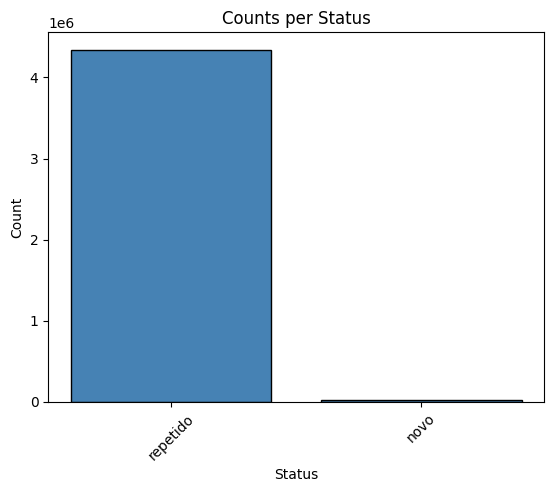

In [17]:

# Get the value counts of the 'status' column
status_counts = w_in_bst['status'].value_counts()

# Plot correctly: status names on X-axis, counts on Y-axis
plt.bar(status_counts.index.astype(str), status_counts.values, color='steelblue', edgecolor='black',)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Counts per Status")
plt.xticks(rotation=45)
plt.xticks(np.arange(2), ['repetido', 'novo']) 
plt.show()


In [18]:
def comp_hist(data: pd.DataFrame, column_name: str):
    """
    Generates and displays a frequency histogram for a specified column.
    
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column you want to plot.
    """
    # 1. Use the 'column_name' parameter to get the value counts
    comp_counts = data[column_name].value_counts()
    comp_counts.index = comp_counts.index.astype(int)
    comp_counts = comp_counts.sort_index()

    labels = comp_counts.index.astype(str)
    
    # Create the plot
    plt.figure(figsize=(12, 7)) # Making the plot a bit bigger
    plt.bar(labels, comp_counts.values, color='orange', edgecolor='black')
    
    # 2. Make the labels and title dynamic using an f-string
    plt.xlabel(column_name.capitalize())
    plt.ylabel("Frequência")
    plt.title(f"Distribuição de Frequência para '{column_name.capitalize()}'")
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


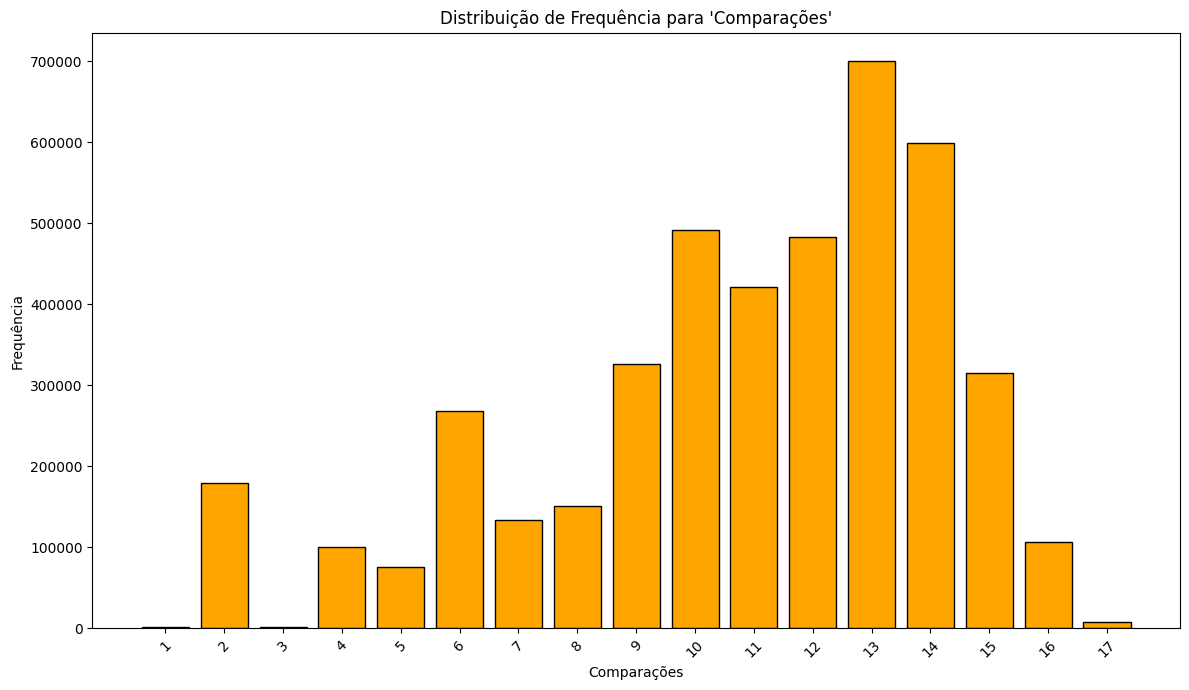

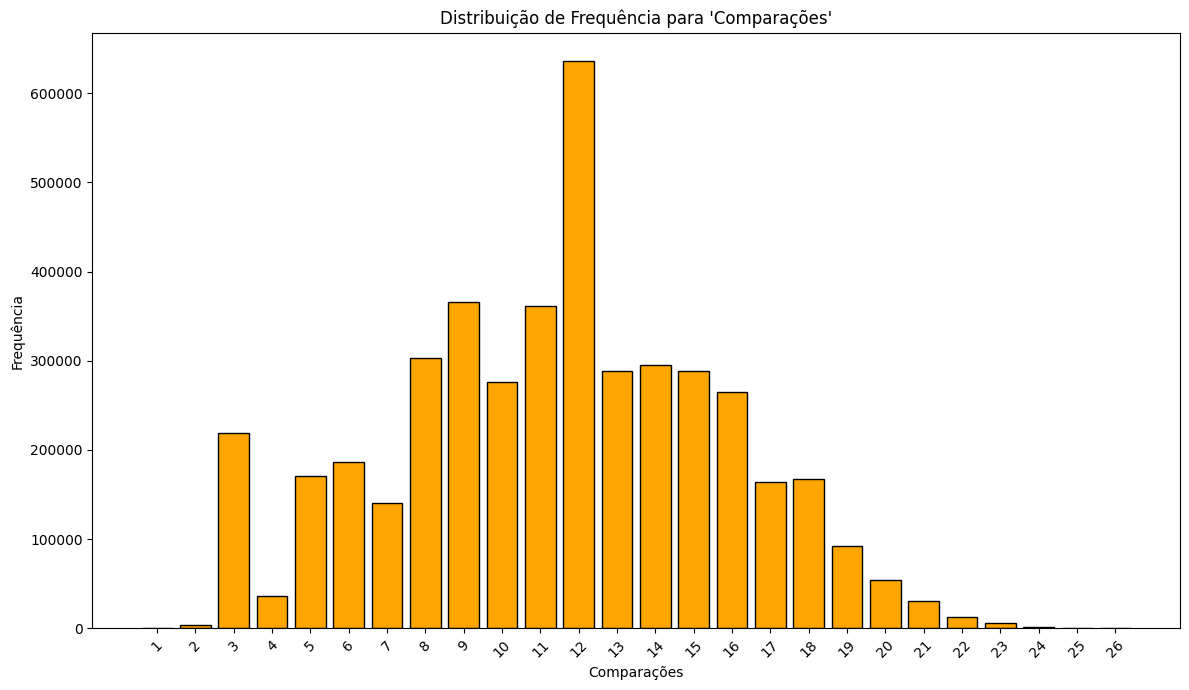

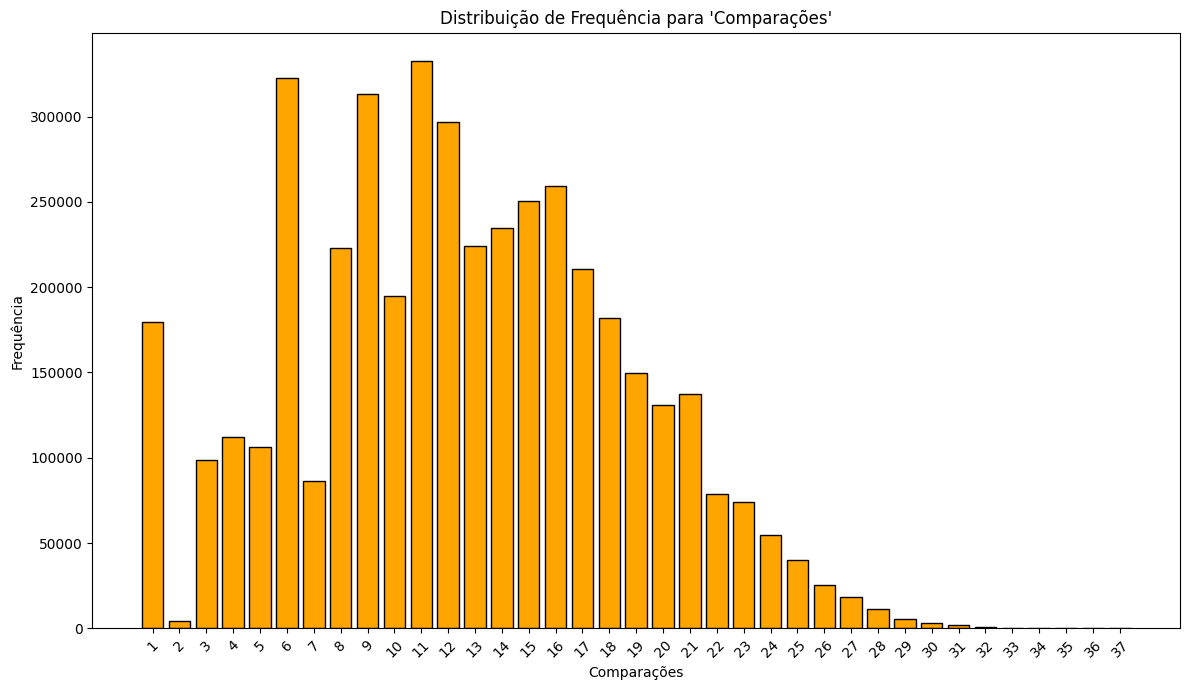

In [19]:
comp_hist(w_in_avl, "comparações")
comp_hist(w_in_rbt, "comparações")
comp_hist(w_in_bst, "comparações")

In [20]:
# --- Helper Function ---
def get_comp_counts(data, col_name):
    """Calculates and sorts the value counts of the 'comparações' column."""
    comp_counts = data[col_name].value_counts()
    comp_counts.index = comp_counts.index.astype(int)
    comp_counts = comp_counts.sort_index()
    return comp_counts

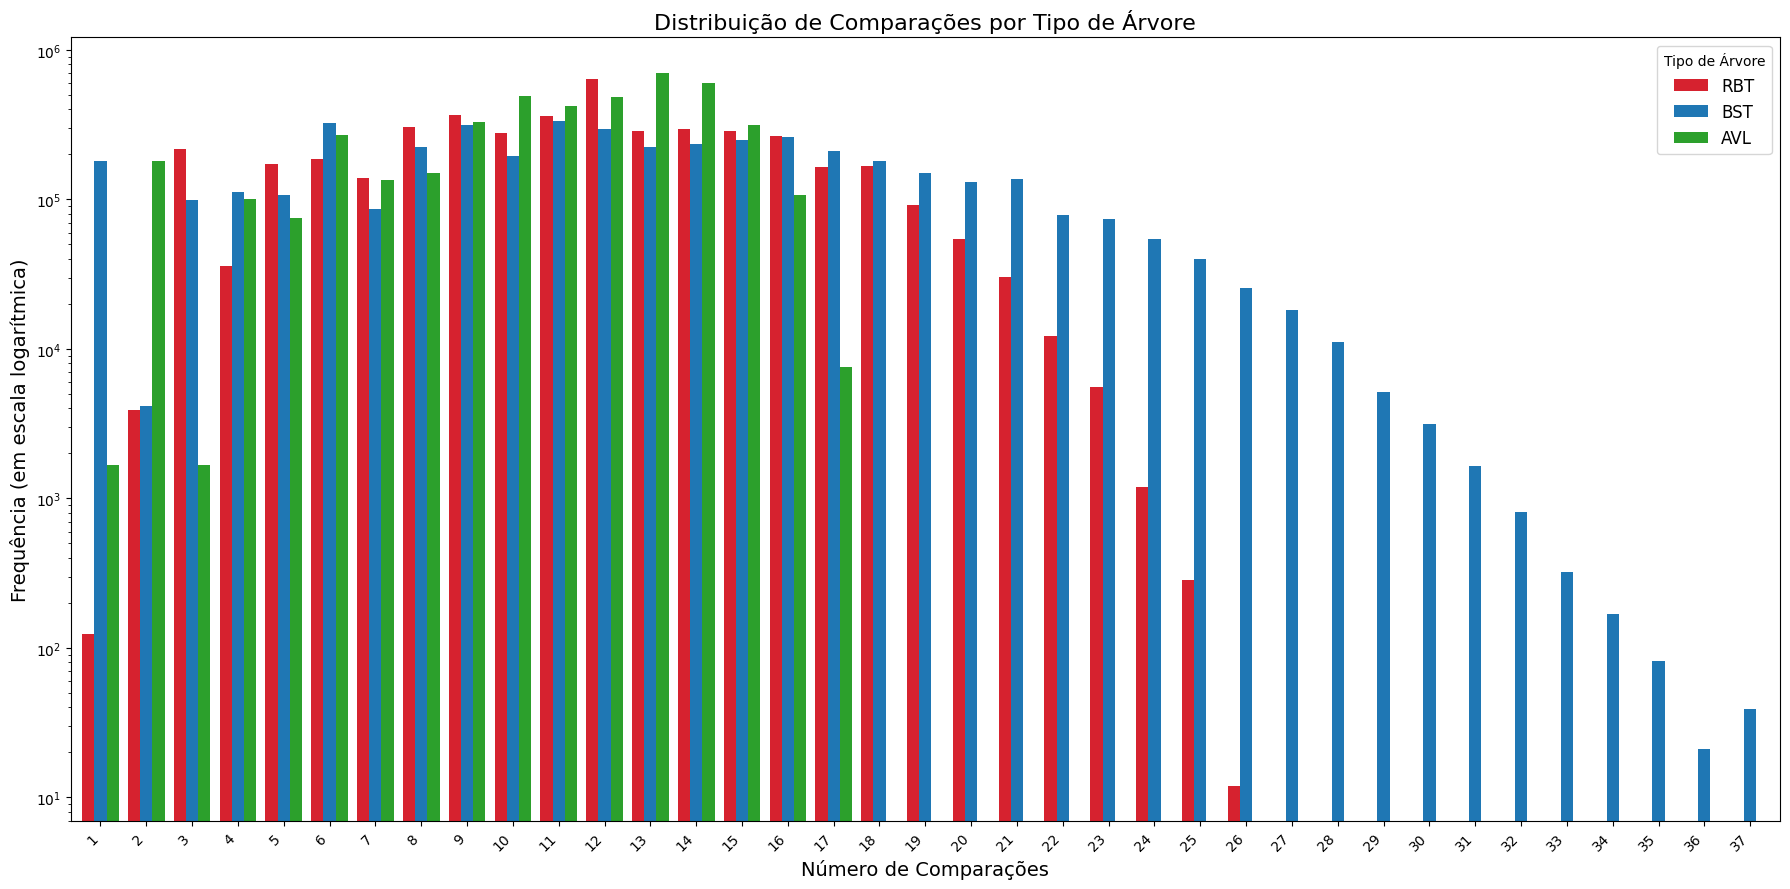

<Figure size 640x480 with 0 Axes>

In [21]:
# Get the comparison counts for each tree type from your loaded dataframes
rbt_counts = get_comp_counts(w_in_rbt, "comparações")
bst_counts = get_comp_counts(w_in_bst, "comparações")
avl_counts = get_comp_counts(w_in_avl, "comparações")

# Combine the counts into a single DataFrame for easy plotting
all_counts_df = pd.DataFrame({
    'RBT': rbt_counts,
    'BST': bst_counts,
    'AVL': avl_counts
}).fillna(0).astype(int) # Fill missing comparison counts with 0

# --- Plotting ---
# Create the grouped bar chart
ax = all_counts_df.plot(
    kind='bar',
    figsize=(18, 9),
    width=0.8,
    color=['#d6222f', '#1f77b4', '#2ca02c'] 
)

# --- Formatting the Plot ---
plt.xlabel("Número de Comparações", fontsize=14)
plt.ylabel("Frequência (em escala logarítmica)", fontsize=14)
plt.title("Distribuição de Comparações por Tipo de Árvore", fontsize=16)

# Use a logarithmic scale for the y-axis to better visualize
# the wide range of frequencies.
plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Árvore', fontsize=12)
plt.tight_layout()

# Display the final graph
plt.show()
plt.savefig('comparacoes_hist.png')

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16528\2623873479.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('comparacoes_line')
C:\Users\Gustavo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


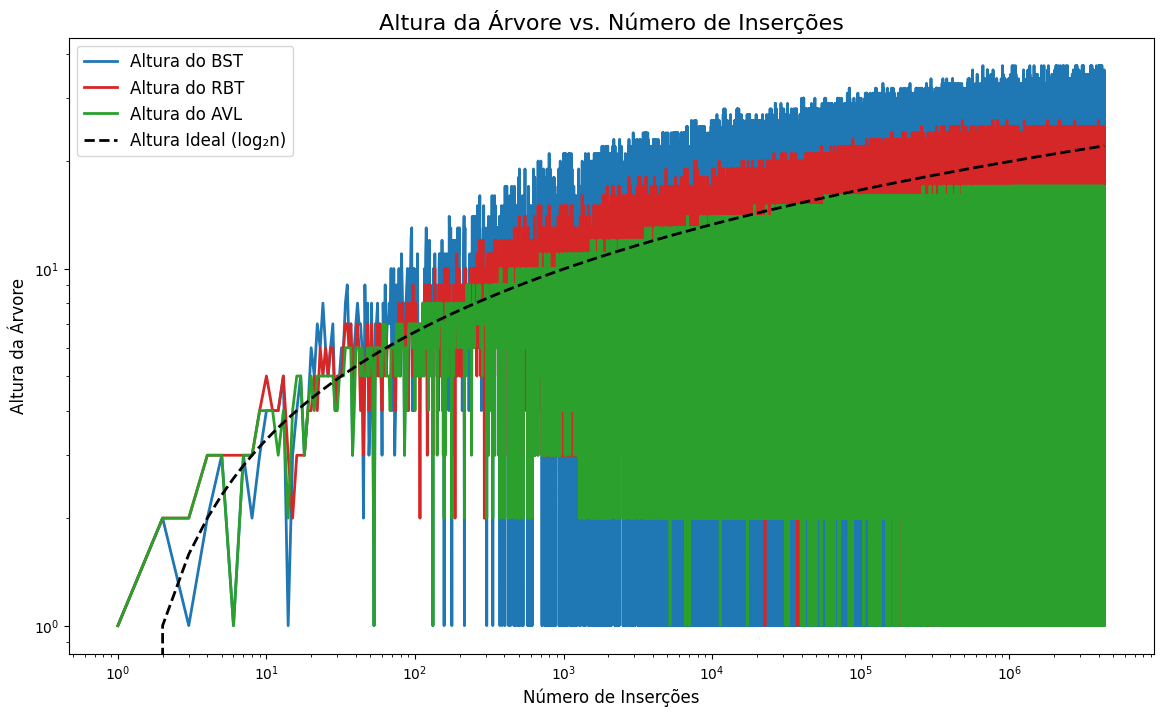

In [22]:
# --- Create an 'insertions' column for the x-axis ---
# The number of insertions is simply the row number (plus 1)
w_in_rbt['inserções'] = np.arange(1, len(w_in_rbt) + 1)
w_in_bst['inserções'] = np.arange(1, len(w_in_bst) + 1)
w_in_avl['inserções'] = np.arange(1, len(w_in_avl) + 1)

# --- Calculate the theoretical best-case height ---
# Use the number of insertions from the largest dataset for the x-axis
n = max(len(w_in_rbt), len(w_in_bst), len(w_in_avl))
x_axis = np.arange(1, n + 1)

# The ideal height of a balanced tree is log base 2 of n
ideal_height = np.log2(x_axis)

# --- Create the Plot ---
plt.figure(figsize=(14, 8))

# Plot the height of each of your trees
plt.plot(w_in_bst['inserções'], w_in_bst['comparações'], label='Altura do BST', color='#1f77b4', linewidth=2)
plt.plot(w_in_rbt['inserções'], w_in_rbt['comparações'], label='Altura do RBT', color='#d62728', linewidth=2)
plt.plot(w_in_avl['inserções'], w_in_avl['comparações'], label='Altura do AVL', color='#2ca02c', linewidth=2)

# Plot the ideal logarithmic height for comparison
plt.plot(x_axis, ideal_height, label='Altura Ideal (log₂n)', color='black', linestyle='--', linewidth=2)

# --- Formatting the Plot ---
plt.title('Altura da Árvore vs. Número de Inserções', fontsize=16)
plt.xlabel('Número de Inserções', fontsize=12)
plt.ylabel('Altura da Árvore', fontsize=12)
plt.legend(fontsize=12)
plt.xscale('log') # Use a log scale on the x-axis to see the full range of insertions
plt.yscale('log') # Use a log scale on the y-axis to better see height differences

plt.savefig('comparacoes_line')
plt.show()


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16528\3331900686.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('balanceamento')


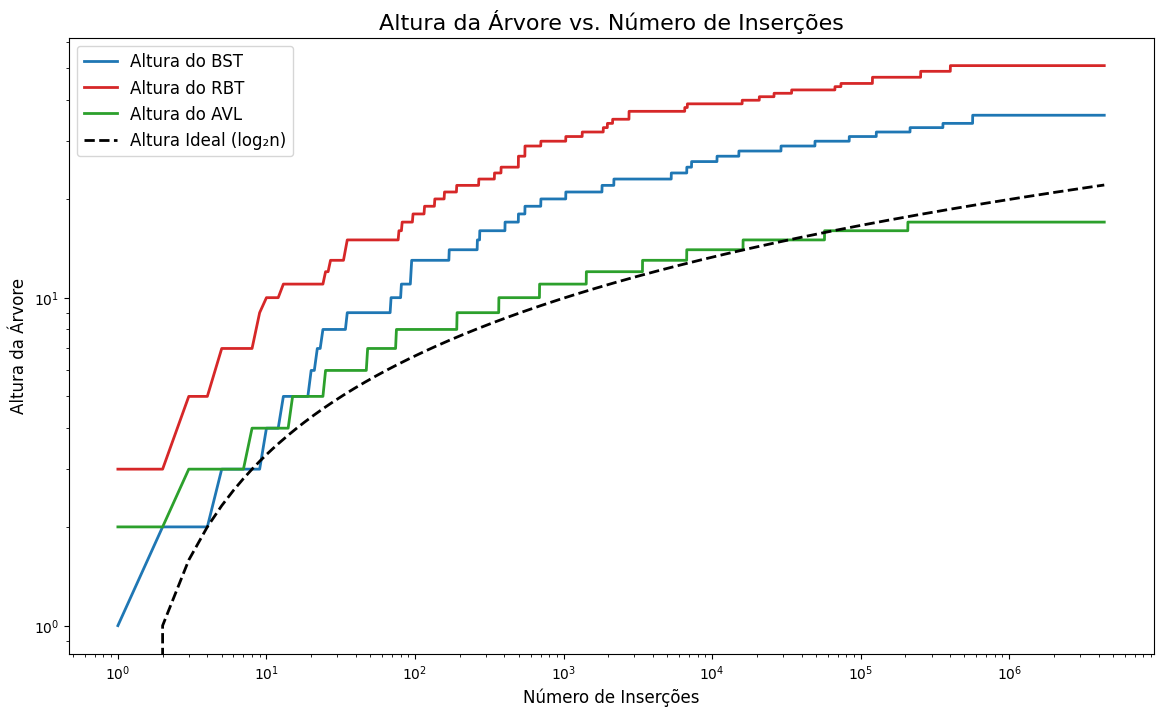

In [23]:
# --- Create an 'insertions' column for the x-axis ---
# The number of insertions is simply the row number (plus 1)
w_in_rbt['inserções'] = np.arange(1, len(w_in_rbt) + 1)
w_in_bst['inserções'] = np.arange(1, len(w_in_bst) + 1)
w_in_avl['inserções'] = np.arange(1, len(w_in_avl) + 1)

# --- Calculate the theoretical best-case height ---
# Use the number of insertions from the largest dataset for the x-axis
n = max(len(w_in_rbt), len(w_in_bst), len(w_in_avl))
x_axis = np.arange(1, n + 1)

# The ideal height of a balanced tree is log base 2 of n
ideal_height = np.log2(x_axis)

# --- Create the Plot ---
plt.figure(figsize=(14, 8))

# Plot the height of each of your trees
plt.plot(w_in_bst['inserções'], w_in_bst['altura'], label='Altura do BST', color='#1f77b4', linewidth=2)
plt.plot(w_in_rbt['inserções'], w_in_rbt['altura'], label='Altura do RBT', color='#d62728', linewidth=2)
plt.plot(w_in_avl['inserções'], w_in_avl['altura'], label='Altura do AVL', color='#2ca02c', linewidth=2)

# Plot the ideal logarithmic height for comparison
plt.plot(x_axis, ideal_height, label='Altura Ideal (log₂n)', color='black', linestyle='--', linewidth=2)

# --- Formatting the Plot ---
plt.title('Altura da Árvore vs. Número de Inserções', fontsize=16)
plt.xlabel('Número de Inserções', fontsize=12)
plt.ylabel('Altura da Árvore', fontsize=12)
plt.legend(fontsize=12)
plt.xscale('log') # Use a log scale on the x-axis to see the full range of insertions
plt.yscale('log') # Use a log scale on the y-axis to better see height differences

plt.savefig('balanceamento')
plt.show()


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16528\2394497221.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('complexidade.png')
C:\Users\Gustavo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


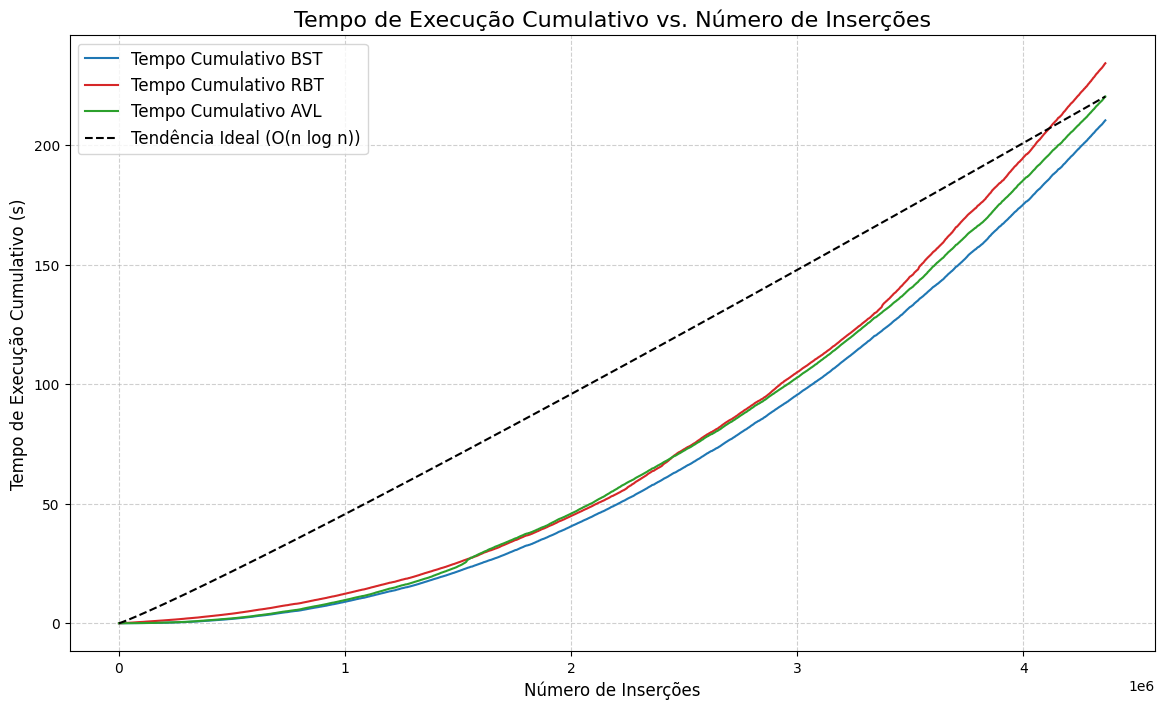

In [24]:
# --- Calculate Cumulative Running Time ---
# Use .cumsum() to get the sum of execution time as it accumulates
w_in_rbt['tempo_cumulativo'] = w_in_rbt['tempo de execução'].cumsum()
w_in_bst['tempo_cumulativo'] = w_in_bst['tempo de execução'].cumsum()
w_in_avl['tempo_cumulativo'] = w_in_avl['tempo de execução'].cumsum()

# --- Create an 'insertions' column for the x-axis ---
w_in_rbt['inserções'] = np.arange(1, len(w_in_rbt) + 1)
w_in_bst['inserções'] = np.arange(1, len(w_in_bst) + 1)
w_in_avl['inserções'] = np.arange(1, len(w_in_avl) + 1)

# --- Calculate the theoretical O(n log n) curve ---
# Use the number of insertions from the largest dataset
n = max(len(w_in_rbt), len(w_in_bst), len(w_in_avl))
x_axis = np.arange(1, n + 1)

# Calculate a scaled n*log(n) curve to visually match the magnitude of your times.
# We'll use the final time of the AVL tree to find a good scaling factor.
last_avl_time = w_in_avl['tempo_cumulativo'].iloc[-1]
last_n_log_n = n * np.log2(n)
scaling_factor = last_avl_time / last_n_log_n

# The ideal O(n log n) trend line, scaled to your data
n_log_n_trend = scaling_factor * (x_axis * np.log2(x_axis))


# --- Create the Plot ---
plt.figure(figsize=(14, 8))

# Plot the cumulative running time for each of your trees
plt.plot(w_in_bst['inserções'], w_in_bst['tempo_cumulativo'], label='Tempo Cumulativo BST', color='#1f77b4')
plt.plot(w_in_rbt['inserções'], w_in_rbt['tempo_cumulativo'], label='Tempo Cumulativo RBT', color='#d62728')
plt.plot(w_in_avl['inserções'], w_in_avl['tempo_cumulativo'], label='Tempo Cumulativo AVL', color='#2ca02c')

# Plot the ideal O(n log n) trend line for comparison
plt.plot(x_axis, n_log_n_trend, label='Tendência Ideal (O(n log n))', color='black', linestyle='--')


# --- Formatting the Plot ---
plt.title('Tempo de Execução Cumulativo vs. Número de Inserções', fontsize=16)
plt.xlabel('Número de Inserções', fontsize=12)
plt.ylabel('Tempo de Execução Cumulativo (s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.6)

plt.savefig('complexidade.png')
plt.show()
